In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('C:/Users/rgangurde/Downloads/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [7]:
df = df.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


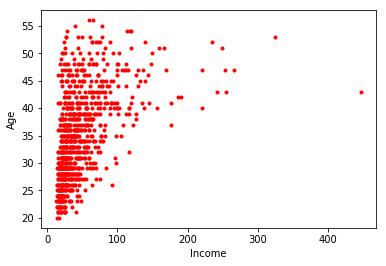

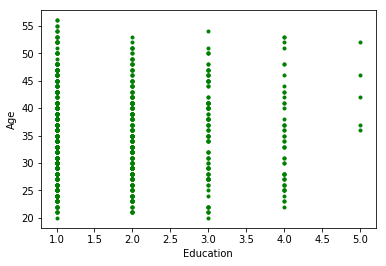

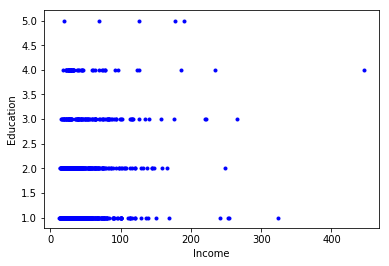

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter( x= df[['Income']], y= df[['Age']], color = 'Red', marker = '.')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()
plt.scatter(x = df[['Edu']], y= df[['Age']], color= 'Green', marker= '.')
plt.xlabel('Education')
plt.ylabel('Age')
plt.show()
plt.scatter(x = df[['Income']], y= df[['Edu']], color= 'Blue', marker= '.')
plt.xlabel('Income')
plt.ylabel('Education')
plt.show()

In [197]:
X = df.values[:, 1:]

from sklearn.preprocessing import StandardScaler

X = np.nan_to_num(X)

In [198]:
from sklearn.cluster import KMeans

kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [199]:
labels = kmeans.labels_
df['Cluster_Label'] = labels

In [200]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_Label,ClusterLabel
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0,1


In [201]:
cl_1 = pd.DataFrame(df[df['Cluster_Label'] == 1])
cl_1.head()
cl_1 = cl_1.drop('ClusterLabel', axis = 1)
cl_1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_Label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
6,7,38,2,4,56,0.442,0.454,0.0,1.6,1
8,9,26,1,5,18,0.575,2.215,NaN,15.5,1


In [202]:
cl_0 = pd.DataFrame(df[df['Cluster_Label'] == 0])
cl_0.head()
cl_0 = cl_0.drop('ClusterLabel', axis = 1)
cl_0.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_Label
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0
43,44,37,5,9,177,0.888,9.555,0.0,5.9,0
82,83,40,3,18,157,3.326,7.036,0.0,6.6,0
198,199,47,3,16,221,15.792,23.104,1.0,17.6,0
207,208,43,1,25,242,1.636,4.656,0.0,2.6,0


In [203]:
cl_2 = pd.DataFrame(df[df['Cluster_Label'] == 2])
cl_2.head()
cl_2 = cl_2.drop('ClusterLabel', axis = 1)
cl_2.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_Label
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
5,6,40,1,23,81,0.998,7.831,NaN,10.9,2
7,8,42,3,0,64,0.279,3.945,0.0,6.6,2
9,10,47,3,23,115,0.653,3.947,0.0,4.0,2
10,11,44,3,8,88,0.285,5.083,1.0,6.1,2


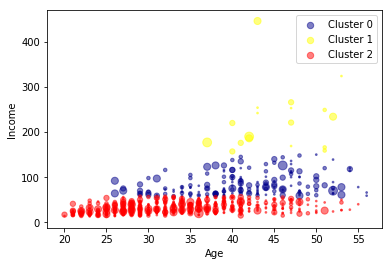

In [173]:
area0 = np.pi * (cl_0['Edu']**2)
area1 = np.pi * (cl_1['Edu']**2)
area2 = np.pi * (cl_2['Edu']**2)
area = np.pi * (X[:,2]**2)
ax = cl_0[:].plot(kind= 'scatter',x= 'Age', y= 'Income', s= area0, color= 'DarkBlue', label = 'Cluster 0', alpha = 0.5);
cl_1[:].plot(kind= 'scatter',x= 'Age', y= 'Income', color= 'Yellow', s= area1, label = 'Cluster 1', ax= ax,  alpha = 0.5);
cl_2[:].plot(kind= 'scatter',x= 'Age', y= 'Income', color= 'Red', s= area2, label = 'Cluster 2', ax= ax,  alpha = 0.5)

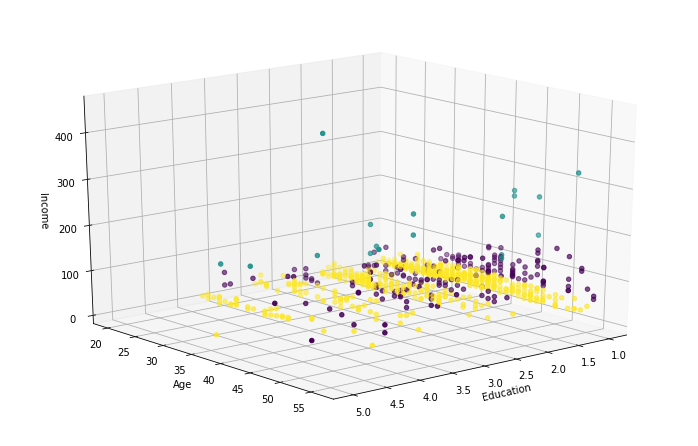

In [196]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize= (10,6))
plt.clf()
ax = Axes3D( fig, rect = [0,0, 0.95, 1], elev= 20, azim = 50)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3],  c= labels.astype(np.float))

# This graph helps to segregate our customers into categories:
## 1. Educated old aged people with high income
## 2. Middle aged and middle income
## 3. Young and low income